In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav
from scipy.signal import find_peaks
import pickle 
from astropy.io import fits
from spectral_cube import SpectralCube
from astropy import units as u
import numpy.ma as ma
from astropy.stats import sigma_clip
import matplotlib.patheffects as path_effects
import matplotlib.colors
from matplotlib.gridspec import GridSpec
import mpl_toolkits.axes_grid1.axes_grid as axes_grid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid.colorbar import colorbar
from matplotlib.patches import Ellipse
import math
from matplotlib import cm
from astropy.wcs import WCS
import scipy
import scipy.ndimage as ndi
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import pkg_resources
from specutils import Spectrum1D, SpectralRegion
from astropy.modeling import models
from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines
from __future__ import print_function
#import pyspeckit
import pylab as pl
from reproject import reproject_interp
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import pandas as pd

C:\Users\lucys\AppData\Local\Temp\ipykernel_10900\1508762011.py:3: DeprecationWarning: Please use `readsav` from the `scipy.io` namespace, the `scipy.io.idl` namespace is deprecated.
  from scipy.io.idl import readsav


In [23]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
hdu1 = fits.open(get_pkg_data_filename('galactic_center/gc_2mass_k.fits'))[0]
hdu2 = fits.open(get_pkg_data_filename('galactic_center/gc_msx_e.fits'))[0]

print(hdu1.header)

SIMPLE  =                    T                                                  BITPIX  =                   16                                                  NAXIS   =                    2                                                  NAXIS1  =                  721                                                  NAXIS2  =                  720                                                  EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H COMMENT                                                                         COMMENT    This mosaic was created using Montage v3.0                           COMMENT                                                                         COMMENT    Montage is maintained by the NASA Infrared Science Archive (IRSA),   COMMENT    part of the Infrared Processi

In [183]:
source = 'GlobC_HNC_32'
path = source + '.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
print(header['ORIGIN'])

CASA 5.1.2-4


In [184]:
header_b = pd.DataFrame({'12CO':[0.25, 337.42934971, -5e-05, 126.0, -20.81741516796, 5e-05, 126.0, 250, 250, -32, 180.0, 'CASA 5.4.0-70'],
                         '13CO':[0.25, 337.42934971, -5e-05, 126.0, -20.81741516796, 5e-05, 126.0, 250, 250, -32, 180.0, 'CASA 5.4.0-70'],
                         'C18O':[0.28, 337.42934971, -5e-05, 126.0, -20.81741516796, 5e-05, 126.0, 250, 250, -32, 180.0, 'CASA 5.4.0-70'], 
                         'CCH':[0.25, 337.4293456831, -4.722222222222e-05, 301.0, -20.81741557774, 4.722222222222e-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.1.2-4'],
                         'CCH_32':[0.15, 337.4293501741, -3.611111111111e-05, 151.0, -20.81741515042, 3.611111111111e-05, 151.0, 300, 300, -32, 180.0, 'CASA 5.4.0-70'],
                         'HC3N':[0.3, 337.4293456831, -4.722222222222e-05, 301.0, -20.81741557774, 4.722222222222e-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.1.2-4'],
                         'HCN':[0.06, 337.4293456831, -4.722222222222e-05, 301.0, -20.81741557774, 4.722222222222e-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.1.2-4'], 
                         'HCN_32':[0.065, 337.4293501741, -3.611111111111e-05, 151.0, -20.81741515042, 3.611111111111e-05, 151.0, 300, 300, -32, 180.0, 'CASA 5.4.0-70'], 
                         'HCOp':[0.08, 337.4293456831, -4.722222222222e-05, 301.0, -20.81741557774, 4.722222222222e-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.1.2-4'], 
                         'HCOp_32':[0.1, 337.4293502177, -3.888888888889e-05, 101.0, -20.81741514942, 3.888888888889e-05, 101.0, 200, 200, -32, 180.0, 'CASA 5.1.2-4'], 
                         'HNC':[0.3, 337.4293456831, -4.722222222222e-05, 301.0, -20.81741557774, 4.722222222222E-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.1.2-4'], 
                         'HNC_32':[0.2, 337.4293502177, -3.888888888889e-05, 101.0, -20.81741514942, 3.888888888889e-05, 101.0, 200, 200, -32, 180.0, 'CASA 5.1.2-4']})

header_c = pd.DataFrame({'CCH':[0.15, 337.407684391, -4.722222222222e-05, 301.0, -20.79947071455, 4.722222222222e-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.6.1-8'],
                         'CCH_32':[0.08, 337.407684391, -3.333333333333e-05, 151.0, -20.79947071196, 3.333333333333e-05, 151.0, 300, 300, -32, 180.0, 'CASA 5.1.2-4'],
                         'HC3N':[0.25, 337.407684391,  -4.722222222222e-05, 301.0, -20.79947071455, 4.722222222222e-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.6.1-8'],
                         'HCN':[0.08, 337.407684391, -4.722222222222e-05, 301.0, -20.79947071455, 4.722222222222e-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.6.1-8'], 
                         'HCN_32':[0.04, 337.407684391, -3.333333333333e-05, 151.0, -20.79947071196, 3.333333333333e-05, 151.0, 300, 300, -32, 180.0, 'CASA 5.1.2-4'], 
                         'HCOp':[0.1, 337.407684391, -4.722222222222e-05, 301.0, -20.79947071455, 4.722222222222e-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.6.1-8'], 
                         'HCOp_32':[0.08, 337.4076835305, -3.333333333333e-05, 151.0, -20.79947070536, 3.333333333333e-05, 151.0, 300, 300, -32, 180.0, 'CASA 5.1.2-4'], 
                         'HNC':[0.08, 337.407684391, -4.722222222222e-05, 301.0, -20.79947071455, 4.722222222222e-05, 301.0, 600, 600, -32, 180.0, 'CASA 5.6.1-8'], 
                         'HNC_32':[0.12, 337.4076835305, -3.333333333333e-05, 151.0, -20.79947070536, 3.333333333333e-05, 151.0, 300, 300, -32, 180.0, 'CASA 5.1.2-4']})

In [93]:
source_array = ['12CO', '13CO', 'C18O', 'CCH', 'CCH_32', 'HC3N', 'HCN', 'HCN_32', 'HCOp', 'HCOp_32', 'HNC', 'HNC_32']

ra_lists = []
dec_lists = []
bmaj = []
bmin = []
bpa = []
for i in source_array:
    path = 'GlobB_' + i + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header

    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
    
    ra_lists.append(ra)
    dec_lists.append(dec)
    
    bmaj.append(header['BMAJ'])
    bmin.append(header['BMIN'])
    bpa.append(header['BPA'])

ra_and_dec = pd.DataFrame({'12CO':[ra_lists[0], dec_lists[0], bmaj[0], bmin[0], bpa[0]],
                          '13CO':[ra_lists[1], dec_lists[1], bmaj[1], bmin[1], bpa[1]],
                          'C18O':[ra_lists[2], dec_lists[2], bmaj[2], bmin[2], bpa[2]],
                          'CCH':[ra_lists[3], dec_lists[3], bmaj[3], bmin[3], bpa[3]], 
                          'CCH_32':[ra_lists[4], dec_lists[4], bmaj[4], bmin[4], bpa[4]],
                          'HC3N':[ra_lists[5], dec_lists[5], bmaj[5], bmin[5], bpa[5]],
                          'HCN':[ra_lists[6], dec_lists[6], bmaj[6], bmin[6], bpa[6]],
                          'HCN_32':[ra_lists[7], dec_lists[7], bmaj[7], bmin[7], bpa[7]],
                          'HCOp':[ra_lists[8], dec_lists[8], bmaj[8], bmin[8], bpa[8]],
                          'HCOp_32':[ra_lists[9], dec_lists[9], bmaj[9], bmin[9], bpa[9]],
                          'HNC':[ra_lists[10], dec_lists[10], bmaj[10], bmin[10], bpa[10]],
                          'HNC_32':[ra_lists[11], dec_lists[11], bmaj[11], bmin[11], bpa[11]]})

display(ra_and_dec)

,12CO,13CO,C18O,CCH,CCH_32,HC3N,HCN,HCN_32,HCOp,HCOp_32,HNC,HNC_32
0,"[337.43559971, 337.43554971, 337.43549971, 337...","[337.43559971, 337.43554971, 337.43549971, 337...","[337.43559971, 337.43554971, 337.43549971, 337...","[337.44351234976665, 337.4434651275444, 337.44...","[337.4347668407667, 337.4347307296556, 337.434...","[337.44351234976665, 337.4434651275444, 337.44...","[337.44351234976665, 337.4434651275444, 337.44...","[337.4347668407667, 337.4347307296556, 337.434...","[337.44351234976665, 337.4434651275444, 337.44...","[337.43323910658887, 337.4332002177, 337.43316...","[337.44351234976665, 337.4434651275444, 337.44...","[337.43323910658887, 337.4332002177, 337.43316..."
1,"[-20.82366516796, -20.82361516796, -20.8235651...","[-20.82366516796, -20.82361516796, -20.8235651...","[-20.82366516796, -20.82361516796, -20.8235651...","[-20.831582244406665, -20.831535022184443, -20...","[-20.822831817086666, -20.822795705975555, -20...","[-20.831582244406665, -20.831535022184443, -20...","[-20.831582244406665, -20.831535022184443, -20...","[-20.822831817086666, -20.822795705975555, -20...","[-20.831582244406665, -20.831535022184443, -20...","[-20.821304038308888, -20.82126514942, -20.821...","[-20.831582244406665, -20.831535022184443, -20...","[-20.821304038308888, -20.82126514942, -20.821..."
2,0.000402,0.000417,0.000416,0.000346,0.000302,0.000308,0.000343,0.000295,0.000342,0.000278,0.000337,0.000273
3,0.000296,0.000307,0.000308,0.000329,0.000234,0.000288,0.000324,0.000232,0.000321,0.000239,0.000317,0.000239
4,65.956154,65.756968,65.976764,-80.346655,84.550997,-79.967758,-82.362369,89.552826,-81.162077,89.589263,-80.440562,-84.994118


In [197]:
def line_ratio_map_b(source1 = 'HCN', source2 = 'HCN_32'):
        
    path = 'GlobB_' + source1 + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header

    data1 = data[0,:,:,:]
    #print(data1[0].header)

    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)

    x1 = round(header["CRPIX1"]-(ra_start-337.43248)/ra_inc)-1
    x2 = round(header["CRPIX1"]-(ra_start-337.428)/ra_inc)-1
    y1 = round(header["CRPIX2"]-(dec_start+20.8175)/dec_inc)-2
    y2 = round(header["CRPIX2"]-(dec_start+20.81354)/dec_inc)-2

    data2 = data1[:, :, np.arange(x1, x2)]
    data3 = data2[:, np.arange(y1, y2), :]

    integrated = np.sum(data3[:, :, :], axis = 0)
    max_val = np.nanmax(integrated)

    extent = [ra[x1], ra[x2], dec[y1], dec[y2]]

    a = [x for x in range(len(data1[:, 0, 0]))]
    array = []
    for i in range(len(a)):
        if np.nanmax(data3[a[i], :, :]) > header_b[source1][0]*max_val:
            array.append(a[i])

    array = [11, 12, 13, 14, 26, 27, 28, 29, 36, 37, 38, 39]
    moment0 = np.sum(data3[array, :, :], axis = 0)

    max_value = np.nanmax(moment0)

    sigma_mask = sigma_clip(moment0, sigma=2, maxiters=None, cenfunc='mean')
    newmask = (moment0 < np.amax(sigma_mask))

    integrated_mask = np.ma.array(moment0, mask = newmask)

    ####################################################################################################
    
    path1 = 'GlobB_'+ source2 + '.image.pbcor.fits'
    cube1 = fits.open(path1)
    data_0 = cube1[0].data
    header1 = cube1[0].header

    data_1 = data_0[0,:,:,:]

    ra1_start = header1["CRVAL1"]
    ra1_inc = header1["CDELT1"]

    channels0 = np.arange(header1["NAXIS1"]) - header1["CRPIX1"]+1

    ra1 = ra1_start + (ra1_inc * channels0)
    ra1 = np.array(ra1, dtype = float)

    dec1_start = header1["CRVAL2"]
    dec1_inc = header1["CDELT2"]

    channels01 = np.arange(header1["NAXIS2"]) - header1["CRPIX2"]+1

    dec1 = dec1_start + (dec1_inc * channels01)
    dec1 = np.array(dec1, dtype = float)
    
    x1_1 = round(header1["CRPIX1"]-(ra1_start-337.43248)/ra1_inc)-1
    x2_1 = round(header1["CRPIX1"]-(ra1_start-337.428)/ra1_inc)-1
    y1_1 = round(header1["CRPIX2"]-(dec1_start+20.8175)/dec1_inc)-2
    y2_1 = round(header1["CRPIX2"]-(dec1_start+20.81354)/dec1_inc)-2

    data_1 = data_0[0,:,:,:]
    data_2 = data_1[:, :, np.arange(x1_1, x2_1)]
    data_3 = data_2[:, np.arange(y1_1, y2_1), :]

    integrated1 = np.sum(data_3[:, :, :], axis = 0)
    max_val1 = np.nanmax(integrated1)

    a1 = [x for x in range(len(data_1[:, 0, 0]))]
    array1 = []
    for i in range(len(a1)):
        if np.nanmax(data_3[a1[i], :, :]) > header_b[source2][0]*max_val1:
            array1.append(a1[i])
            
    ####################################################################################################

    hdu1.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
    hdu1.header['CRVAL1'] = header_b[source1][1]
    hdu1.header['CDELT1'] = header_b[source1][2]
    hdu1.header['CRPIX1'] = header_b[source1][3]
    hdu1.header['CUNIT1'] = 'deg'
    hdu1.header['CTYPE2'] = 'DEC--SIN'
    hdu1.header['CRVAL2'] = header_b[source1][4] 
    hdu1.header['CDELT2'] = header_b[source1][5]
    hdu1.header['CRPIX2'] = header_b[source1][6]
    hdu1.header['CUNIT2'] = 'deg'
    hdu1.header['NAXIS1'] = header_b[source1][7]
    hdu1.header['NAXIS2'] = header_b[source1][8]
    hdu1.header['BITPIX'] = header_b[source1][9]
    hdu1.header['LONPOLE'] = header_b[source1][10] 
    hdu1.header['BUNIT'] = 'Jy/beam'
    hdu1.header['TELESCOP'] = 'ALMA'
    hdu1.header['INSTRUME'] = 'ALMA'
    hdu1.header['ORIGIN'] = header_b[source1][11]

    hdu2.header['CTYPE1'] = 'RA---SIN' 
    hdu2.header['CRVAL1'] = header_b[source2][1]
    hdu2.header['CDELT1'] = header_b[source2][2]
    hdu2.header['CRPIX1'] = header_b[source2][3]
    hdu2.header['CUNIT1'] = 'deg'
    hdu2.header['CTYPE2'] = 'DEC--SIN'
    hdu2.header['CRVAL2'] = header_b[source2][4]
    hdu2.header['CDELT2'] = header_b[source2][5]
    hdu2.header['CRPIX2'] = header_b[source2][6] 
    hdu2.header['CUNIT2'] = 'deg'
    hdu2.header['NAXIS1'] = header_b[source2][7]
    hdu2.header['NAXIS2'] = header_b[source2][8]
    hdu2.header['BITPIX'] = header_b[source2][9]
    hdu2.header['LONPOLE'] = header_b[source2][10] 
    hdu2.header['BUNIT'] = 'Jy/beam'
    hdu2.header['TELESCOP'] = 'ALMA'
    hdu2.header['INSTRUME'] = 'ALMA'
    hdu2.header['ORIGIN'] = header_b[source2][11]
    
    ####################################################################################################
    
    array1 = [4, 5, 6, 7]
    integrated1 = np.sum(data_1[array1, :, :], axis = 0)
    from reproject import reproject_interp, reproject_adaptive
    new_array, footprint = reproject_adaptive((integrated1, hdu2.header), hdu1.header)
    #print(integrated1)
    sigma_mask1 = sigma_clip(new_array, sigma=2, maxiters=None, cenfunc='mean')
    newmask1 = (new_array < np.amax(sigma_mask1))

    integrated1_mask = np.ma.array(new_array, mask = newmask1)

    data_2 = integrated1_mask[:, np.arange(x1, x2)]
    data_3 = data_2[np.arange(y1, y2), :]
    print(integrated1_mask.shape)
    extent = [ra[x1], ra[x2], dec[y1], dec[y2]]

    ratio = data_3/integrated_mask
    
    #data_3 is the second source, integrated_mask is the first source
    
    return ratio
    
    #plt.savefig(globule + '_' + source1 + '_' + source + ' Ratio.png', bbox_inches='tight')

In [109]:
print(ra_and_dec['HNC'][0][250], ra_and_dec['HNC'][0][300])
print(ra_and_dec['HNC'][1][300], ra_and_dec['HNC'][1][350])

337.4317067942111 337.4293456831
-20.81741557774 -20.81505446662889


C:\Users\lucys\AppData\Local\Temp\ipykernel_10900\1572501518.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm1 = plt.cm.get_cmap('PRGn')


(600, 600)


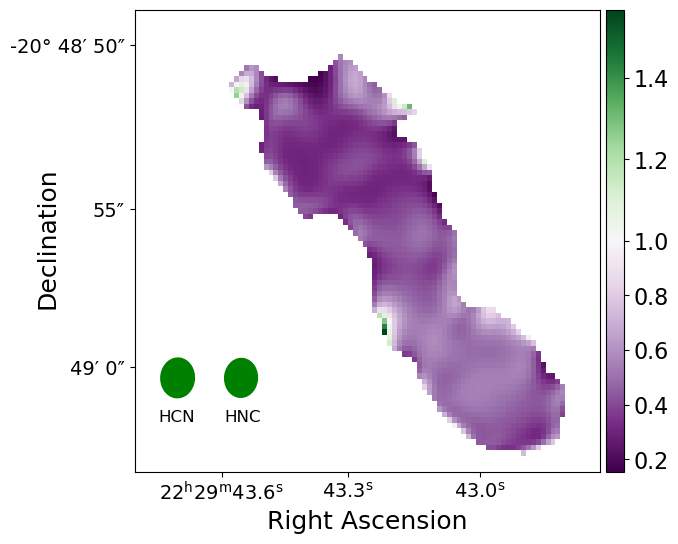

In [201]:
#from matplotlib.colors import DivergingNorm
fig = plt.figure(figsize = [6, 6])
ax1 = fig.add_subplot(1, 1, 1)

extent=[337.43249971, 337.42799971, -20.81756516796, -20.81356516796]

cm1 = plt.cm.get_cmap('PRGn')
im = ax1.imshow(line_ratio_map_b(source1 = 'HCN', source2 = 'HNC'), origin ='lower', cmap = cm1, extent = extent, aspect = 'auto',
               norm=colors.TwoSlopeNorm(1))

#ax2 = fig.add_subplot(1, 1, 1)
bmaj = ra_and_dec['HCN'][2] #major beam width
bmin = ra_and_dec['HCN'][3] #minor beam width
bpa = ra_and_dec['HCN'][4]
beam = Ellipse(xy=(ra_and_dec['HNC'][0][242], ra_and_dec['HNC'][1][314]), width=bmaj, height=bmin, angle=bpa, color = 'green', zorder = 1)
ax1.add_artist(beam)

bmaj = ra_and_dec['HNC'][2] #major beam width
bmin = ra_and_dec['HNC'][3] #minor beam width
bpa = ra_and_dec['HNC'][4]
beam = Ellipse(xy=(ra_and_dec['HNC'][0][255], ra_and_dec['HNC'][1][314]), width=bmaj, height=bmin, angle=bpa, color = 'green', zorder = 1)
ax1.add_artist(beam)

ra_val1 = np.abs(ra_and_dec['HNC'][0] - 337.4316667).argmin()
ra_val2 = np.abs(ra_and_dec['HNC'][0] - 337.4304167).argmin()
ra_val3 = np.abs(ra_and_dec['HNC'][0] - 337.4291667).argmin()
#ra_val4 = np.abs(ra - 337.4283333).argmin()
ax1.set_xticks([ra_and_dec['HNC'][0][ra_val1], ra_and_dec['HNC'][0][ra_val2], ra_and_dec['HNC'][0][ra_val3]])
ax1.set_xticklabels(['$\mathrm{22^{h}29^{m}43.6^{s}}$', '$\mathrm{43.3^{s}}$', '$\mathrm{43.0^{s}}$'], fontsize = 14)

dec_val4 = np.abs(ra_and_dec['HNC'][1] + 20.8138889).argmin()
dec_val3 = np.abs(ra_and_dec['HNC'][1] + 20.8152778).argmin()
dec_val2 = np.abs(ra_and_dec['HNC'][1] + 20.8166667).argmin()
#dec_val1 = np.abs(dec + 20.8180556).argmin()
ax1.set_yticks([ra_and_dec['HNC'][1][dec_val2], ra_and_dec['HNC'][1][dec_val3], ra_and_dec['HNC'][1][dec_val4]])
ax1.set_yticklabels(['49′ 0″','55″','-20° 48′ 50″'], fontsize = 14)

fig.text(0.195, 0.2, 'HCN', fontsize=12, horizontalalignment='center', verticalalignment='center', rotation = 'horizontal')
fig.text(0.305, 0.2, 'HNC', fontsize=12, horizontalalignment='center', verticalalignment='center', rotation = 'horizontal')
    
plt.xlabel('Right Ascension',fontsize=18)
#plt.ylabel('Declination',fontsize=18)
fig.text(-0.02, 0.5, 'Declination', fontsize=18, horizontalalignment='center', verticalalignment='center', rotation = 'vertical')
#fig.text(1.05, 0.5, '<-(More HCN)     --HNC/HCN Ratio--     (More HNC)->', fontsize=11, horizontalalignment='center', verticalalignment='center', rotation = 'vertical')

cbaxes1 = fig.add_axes([0.91, 0.11, 0.03, 0.77], zorder = 4) 
cbar1 = fig.colorbar(im, cax=cbaxes1, orientation='vertical')

for t in cbar1.ax.get_yticklabels():
    t.set_fontsize(16)
    
plt.savefig('GlobuleB_HNC_HCN_ratio.png', bbox_inches='tight')

In [169]:
source_array = ['CCH', 'CCH_32', 'HC3N', 'HCN', 'HCN_32', 'HCOp', 'HCOp_32', 'HNC', 'HNC_32']

ra_lists = []
dec_lists = []
bmaj = []
bmin = []
bpa = []
for i in source_array:
    path = 'GlobC_' + i + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header

    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)
    
    ra_lists.append(ra)
    dec_lists.append(dec)
    
    bmaj.append(header['BMAJ'])
    bmin.append(header['BMIN'])
    bpa.append(header['BPA'])

ra_and_dec_c = pd.DataFrame({'CCH':[ra_lists[0], dec_lists[0], bmaj[0], bmin[0], bpa[0]], 
                          'CCH_32':[ra_lists[1], dec_lists[1], bmaj[1], bmin[1], bpa[1]],
                          'HC3N':[ra_lists[2], dec_lists[2], bmaj[2], bmin[2], bpa[2]],
                          'HCN':[ra_lists[3], dec_lists[3], bmaj[3], bmin[3], bpa[3]],
                          'HCN_32':[ra_lists[4], dec_lists[4], bmaj[4], bmin[4], bpa[4]],
                          'HCOp':[ra_lists[5], dec_lists[5], bmaj[5], bmin[5], bpa[5]],
                          'HCOp_32':[ra_lists[6], dec_lists[6], bmaj[6], bmin[6], bpa[6]],
                          'HNC':[ra_lists[7], dec_lists[7], bmaj[7], bmin[7], bpa[7]],
                          'HNC_32':[ra_lists[8], dec_lists[8], bmaj[8], bmin[8], bpa[8]]})

display(ra_and_dec)

,12CO,13CO,C18O,CCH,CCH_32,HC3N,HCN,HCN_32,HCOp,HCOp_32,HNC,HNC_32
0,"[337.43559971, 337.43554971, 337.43549971, 337...","[337.43559971, 337.43554971, 337.43549971, 337...","[337.43559971, 337.43554971, 337.43549971, 337...","[337.44351234976665, 337.4434651275444, 337.44...","[337.4347668407667, 337.4347307296556, 337.434...","[337.44351234976665, 337.4434651275444, 337.44...","[337.44351234976665, 337.4434651275444, 337.44...","[337.4347668407667, 337.4347307296556, 337.434...","[337.44351234976665, 337.4434651275444, 337.44...","[337.43323910658887, 337.4332002177, 337.43316...","[337.44351234976665, 337.4434651275444, 337.44...","[337.43323910658887, 337.4332002177, 337.43316..."
1,"[-20.82366516796, -20.82361516796, -20.8235651...","[-20.82366516796, -20.82361516796, -20.8235651...","[-20.82366516796, -20.82361516796, -20.8235651...","[-20.831582244406665, -20.831535022184443, -20...","[-20.822831817086666, -20.822795705975555, -20...","[-20.831582244406665, -20.831535022184443, -20...","[-20.831582244406665, -20.831535022184443, -20...","[-20.822831817086666, -20.822795705975555, -20...","[-20.831582244406665, -20.831535022184443, -20...","[-20.821304038308888, -20.82126514942, -20.821...","[-20.831582244406665, -20.831535022184443, -20...","[-20.821304038308888, -20.82126514942, -20.821..."
2,0.000402,0.000417,0.000416,0.000346,0.000302,0.000308,0.000343,0.000295,0.000342,0.000278,0.000337,0.000273
3,0.000296,0.000307,0.000308,0.000329,0.000234,0.000288,0.000324,0.000232,0.000321,0.000239,0.000317,0.000239
4,65.956154,65.756968,65.976764,-80.346655,84.550997,-79.967758,-82.362369,89.552826,-81.162077,89.589263,-80.440562,-84.994118


In [166]:
def line_ratio_map_c(source1 = 'HCN', source2 = 'HCN_32'):
        
    path = 'GlobC_' + source1 + '.image.pbcor.fits'
    cube = fits.open(path)
    data = cube[0].data
    header = cube[0].header

    data1 = data[0,:,:,:]
    #print(data1[0].header)

    ra_start = header["CRVAL1"]
    ra_inc = header["CDELT1"]

    channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

    ra = ra_start + (ra_inc * channels)
    ra = np.array(ra, dtype = float)

    dec_start = header["CRVAL2"]
    dec_inc = header["CDELT2"]

    channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

    dec = dec_start + (dec_inc * channels1)
    dec = np.array(dec, dtype = float)

    x1 = round(header["CRPIX1"]-(ra_start-337.40975)/ra_inc)-1
    x2 = round(header["CRPIX1"]-(ra_start-337.40565)/ra_inc)-1
    y1 = round(header["CRPIX2"]-(dec_start+20.80087)/dec_inc)-1
    y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1

    data2 = data1[:, :, np.arange(x1, x2)]
    data3 = data2[:, np.arange(y1, y2), :]

    integrated = np.sum(data3[:, :, :], axis = 0)
    max_val = np.nanmax(integrated)

    extent = [ra[x1], ra[x2], dec[y1], dec[y2]]

    a = [x for x in range(len(data1[:, 0, 0]))]
    array = []
    for i in range(len(a)):
        if np.nanmax(data3[a[i], :, :]) > header_c[source1][0]*max_val:
            array.append(a[i])

    #array = [11, 12, 13, 14, 26, 27, 28, 29, 36, 37, 38, 39]
    moment0 = np.sum(data3[array, :, :], axis = 0)

    max_value = np.nanmax(moment0)

    sigma_mask = sigma_clip(moment0, sigma=2, maxiters=None, cenfunc='mean')
    newmask = (moment0 < np.amax(sigma_mask))

    integrated_mask = np.ma.array(moment0, mask = newmask)

    ####################################################################################################
    
    path1 = 'GlobC_'+ source2 + '.image.pbcor.fits'
    cube1 = fits.open(path1)
    data_0 = cube1[0].data
    header1 = cube1[0].header

    data_1 = data_0[0,:,:,:]

    ra1_start = header1["CRVAL1"]
    ra1_inc = header1["CDELT1"]

    channels0 = np.arange(header1["NAXIS1"]) - header1["CRPIX1"]+1

    ra1 = ra1_start + (ra1_inc * channels0)
    ra1 = np.array(ra1, dtype = float)

    dec1_start = header1["CRVAL2"]
    dec1_inc = header1["CDELT2"]

    channels01 = np.arange(header1["NAXIS2"]) - header1["CRPIX2"]+1

    dec1 = dec1_start + (dec1_inc * channels01)
    dec1 = np.array(dec1, dtype = float)
    
    x1_1 = round(header1["CRPIX1"]-(ra1_start-337.40975)/ra1_inc)-1
    x2_1 = round(header1["CRPIX1"]-(ra1_start-337.40565)/ra1_inc)-1
    y1_1 = round(header1["CRPIX2"]-(dec1_start+20.80087)/dec1_inc)-1
    y2_1 = round(header1["CRPIX2"]-(dec1_start+20.796)/dec1_inc)-1

    data_1 = data_0[0,:,:,:]
    data_2 = data_1[:, :, np.arange(x1_1, x2_1)]
    data_3 = data_2[:, np.arange(y1_1, y2_1), :]

    integrated1 = np.sum(data_3[:, :, :], axis = 0)
    max_val1 = np.nanmax(integrated1)

    a1 = [x for x in range(len(data_1[:, 0, 0]))]
    array1 = []
    for i in range(len(a1)):
        if np.nanmax(data_3[a1[i], :, :]) > header_c[source2][0]*max_val1:
            array1.append(a1[i])
            
    ####################################################################################################

    hdu1.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
    hdu1.header['CRVAL1'] = header_c[source1][1]
    hdu1.header['CDELT1'] = header_c[source1][2]
    hdu1.header['CRPIX1'] = header_c[source1][3]
    hdu1.header['CUNIT1'] = 'deg'
    hdu1.header['CTYPE2'] = 'DEC--SIN'
    hdu1.header['CRVAL2'] = header_c[source1][4] 
    hdu1.header['CDELT2'] = header_c[source1][5]
    hdu1.header['CRPIX2'] = header_c[source1][6]
    hdu1.header['CUNIT2'] = 'deg'
    hdu1.header['NAXIS1'] = header_c[source1][7]
    hdu1.header['NAXIS2'] = header_c[source1][8]
    hdu1.header['BITPIX'] = header_c[source1][9]
    hdu1.header['LONPOLE'] = header_c[source1][10] 
    hdu1.header['BUNIT'] = 'Jy/beam'
    hdu1.header['TELESCOP'] = 'ALMA'
    hdu1.header['INSTRUME'] = 'ALMA'
    hdu1.header['ORIGIN'] = header_c[source1][11]

    hdu2.header['CTYPE1'] = 'RA---SIN' 
    hdu2.header['CRVAL1'] = header_c[source2][1]
    hdu2.header['CDELT1'] = header_c[source2][2]
    hdu2.header['CRPIX1'] = header_c[source2][3]
    hdu2.header['CUNIT1'] = 'deg'
    hdu2.header['CTYPE2'] = 'DEC--SIN'
    hdu2.header['CRVAL2'] = header_c[source2][4]
    hdu2.header['CDELT2'] = header_c[source2][5]
    hdu2.header['CRPIX2'] = header_c[source2][6] 
    hdu2.header['CUNIT2'] = 'deg'
    hdu2.header['NAXIS1'] = header_c[source2][7]
    hdu2.header['NAXIS2'] = header_c[source2][8]
    hdu2.header['BITPIX'] = header_c[source2][9]
    hdu2.header['LONPOLE'] = header_c[source2][10] 
    hdu2.header['BUNIT'] = 'Jy/beam'
    hdu2.header['TELESCOP'] = 'ALMA'
    hdu2.header['INSTRUME'] = 'ALMA'
    hdu2.header['ORIGIN'] = header_c[source2][11]
    
    ####################################################################################################
    
    #array1 = [4, 5, 6, 7]
    integrated1 = np.sum(data_1[array1, :, :], axis = 0)
    from reproject import reproject_interp, reproject_adaptive
    new_array, footprint = reproject_adaptive((integrated1, hdu2.header), hdu1.header)
    #print(integrated1)
    sigma_mask1 = sigma_clip(new_array, sigma=2, maxiters=None, cenfunc='mean')
    newmask1 = (new_array < np.amax(sigma_mask1))

    integrated1_mask = np.ma.array(new_array, mask = newmask1)

    data_2 = integrated1_mask[:, np.arange(x1, x2)]
    data_3 = data_2[np.arange(y1, y2), :]
    print(integrated1_mask.shape)
    extent = [ra[x1], ra[x2], dec[y1], dec[y2]]

    ratio = data_3/integrated_mask
    
    #data_3 is the second source, integrated_mask is the first source
    
    return ratio

C:\Users\lucys\AppData\Local\Temp\ipykernel_10900\1532254.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm1 = plt.cm.get_cmap('PRGn')


(600, 600)


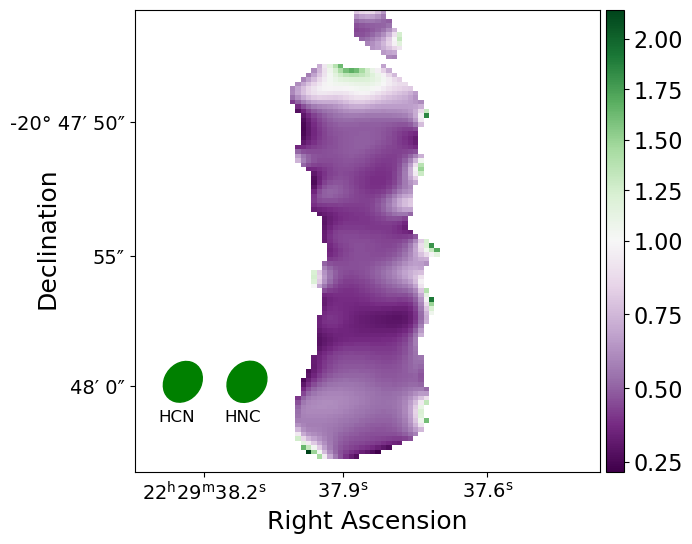

In [194]:
fig = plt.figure(figsize = [6, 6])
ax1 = fig.add_subplot(1, 1, 1)

extent = [337.4097621687778, 337.4056538354444, -20.80088738121667, -20.79602349232778]

cm1 = plt.cm.get_cmap('PRGn')
im = ax1.imshow(line_ratio_map_c(source1 = 'HCN', source2 = 'HNC'), origin ='lower', cmap = cm1, extent = extent, aspect = 'auto',
               norm=colors.TwoSlopeNorm(1))

#ax2 = fig.add_subplot(1, 1, 1)
bmaj = ra_and_dec_c['HNC'][2] #major beam width
bmin = ra_and_dec_c['HNC'][3] #minor beam width
bpa = ra_and_dec_c['HNC'][4]
beam = Ellipse(xy=(ra_and_dec_c['HNC'][0][265], ra_and_dec_c['HNC'][1][290]), width=bmaj, height=bmin, angle=bpa, color = 'green', zorder = 1)
ax1.add_artist(beam)

bmaj = ra_and_dec_c['HCN'][2] #major beam width
bmin = ra_and_dec_c['HCN'][3] #minor beam width
bpa = ra_and_dec_c['HCN'][4]
beam = Ellipse(xy=(ra_and_dec_c['HNC'][0][277], ra_and_dec_c['HNC'][1][290]), width=bmaj, height=bmin, angle=bpa, color = 'green', zorder = 1)
ax1.add_artist(beam)

ra_val1 = np.abs(ra_and_dec_c['HNC'][0] - 337.4091667 ).argmin()
ra_val2 = np.abs(ra_and_dec_c['HNC'][0] - 337.4079167).argmin()
ra_val3 = np.abs(ra_and_dec_c['HNC'][0] - 337.4066667).argmin()
#ra_val4 = np.abs(ra - 337.4287500).argmin()
ax1.set_xticks([ra_and_dec_c['HNC'][0][ra_val1], ra_and_dec_c['HNC'][0][ra_val2], ra_and_dec_c['HNC'][0][ra_val3]])
ax1.set_xticklabels(['$\mathrm{22^{h}29^{m}38.2^{s}}$', '$\mathrm{37.9^{s}}$', '$\mathrm{37.6^{s}}$'], fontsize = 14)

dec_val4 = np.abs(ra_and_dec_c['HNC'][1] + 20.7972222).argmin()
dec_val3 = np.abs(ra_and_dec_c['HNC'][1] + 20.7986111).argmin()
dec_val2 = np.abs(ra_and_dec_c['HNC'][1] + 20.8000000).argmin()
#dec_val1 = np.abs(dec + 20.8180556).argmin()
ax1.set_yticks([ra_and_dec_c['HNC'][1][dec_val2], ra_and_dec_c['HNC'][1][dec_val3], ra_and_dec_c['HNC'][1][dec_val4]])
ax1.set_yticklabels(['48′ 0″','55″','-20° 47′ 50″'], fontsize = 14)

fig.text(0.195, 0.2, 'HCN', fontsize=12, horizontalalignment='center', verticalalignment='center', rotation = 'horizontal')
fig.text(0.305, 0.2, 'HNC', fontsize=12, horizontalalignment='center', verticalalignment='center', rotation = 'horizontal')
    
plt.xlabel('Right Ascension',fontsize=18)
#plt.ylabel('Declination',fontsize=18)
fig.text(-0.02, 0.5, 'Declination', fontsize=18, horizontalalignment='center', verticalalignment='center', rotation = 'vertical')
#fig.text(1.05, 0.5, '<-(More HCN)     --HNC/HCN Ratio--     (More HNC)->', fontsize=11, horizontalalignment='center', verticalalignment='center', rotation = 'vertical')

cbaxes1 = fig.add_axes([0.91, 0.11, 0.03, 0.77], zorder = 4) 
cbar1 = fig.colorbar(im, cax=cbaxes1, orientation='vertical')

for t in cbar1.ax.get_yticklabels():
    t.set_fontsize(16)
    
plt.savefig('GlobuleC_HNC_HCN_ratio.png', bbox_inches='tight')